In [60]:
#Libraries

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from math import sqrt
from sklearn.metrics import r2_score, mean_squared_error
import statsmodels.api as sm
import seaborn as sns
import pickle

In [4]:
df = pd.read_csv('advertising.csv')

In [6]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


Handling Missing Data and removing duplicate Data

In [8]:
df.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [14]:
print(df.columns)


Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')


In [16]:
df.columns = df.columns.str.strip()


In [18]:
if 'Unnamed: 0' in df.columns:
    df.drop(['Unnamed: 0'], axis=1, inplace=True)
else:
    print("'Unnamed: 0' not found in DataFrame")

'Unnamed: 0' not found in DataFrame


In [20]:
df.duplicated().sum()


0

In [22]:

df.drop_duplicates(inplace=True)
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [24]:
df.dtypes


TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

In [26]:
df.describe()


,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [28]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


FEATURE ENGINEERING



In [30]:
x=df.iloc[:,:-1]
x

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [32]:

y=df.iloc[:,-1]
y

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64

DATA VISUALIZATION



<Axes: xlabel='TV', ylabel='Sales'>

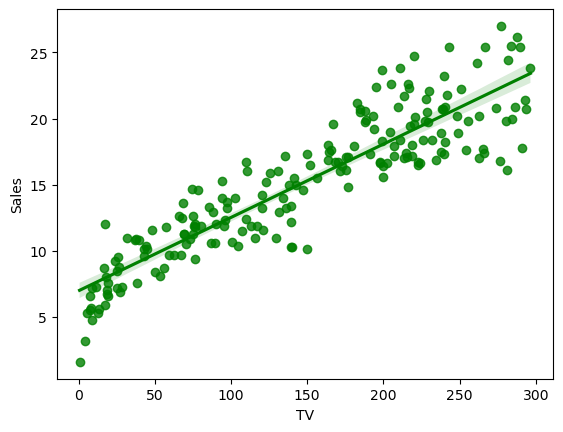

In [34]:
#TV Vs Sales Plot
sns.regplot(x=df['TV'],y=y,color='Green')

<Axes: xlabel='Newspaper', ylabel='Sales'>

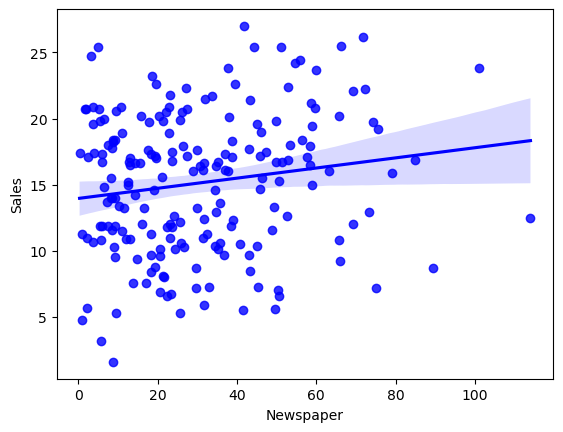

In [36]:
#NewsPaper Vs Sales Plot
sns.regplot(x=df['Newspaper'],y=y,color='blue')

<Axes: xlabel='Radio', ylabel='Sales'>

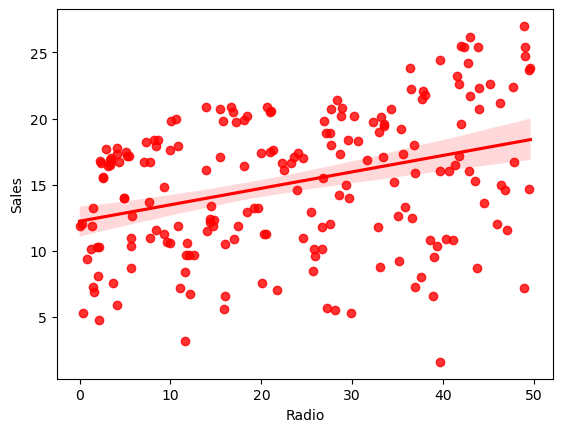

In [38]:
#Radio Vs Sales Plot
sns.regplot(x=df['Radio'],y=y,color='red')

Splitting of training and testing data



In [40]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)
x_train

,TV,Radio,Newspaper
116,139.2,14.3,25.6
67,139.3,14.5,10.2
78,5.4,29.9,9.4
42,293.6,27.7,1.8
17,281.4,39.6,55.8
...,...,...,...
133,219.8,33.5,45.1
137,273.7,28.9,59.7
72,26.8,33.0,19.3
140,73.4,17.0,12.9


In [42]:
x_test

,TV,Radio,Newspaper
58,210.8,49.6,37.7
40,202.5,22.3,31.6
34,95.7,1.4,7.4
102,280.2,10.1,21.4
184,253.8,21.3,30.0
198,283.6,42.0,66.2
95,163.3,31.6,52.9
4,180.8,10.8,58.4
29,70.6,16.0,40.8
168,215.4,23.6,57.6


In [44]:
y_train

116    12.2
67     13.4
78      5.3
42     20.7
17     24.4
       ... 
133    19.6
137    20.8
72      8.8
140    10.9
37     14.7
Name: Sales, Length: 140, dtype: float64

In [46]:
y_test


58     23.8
40     16.6
34     11.9
102    19.8
184    17.6
198    25.5
95     16.9
4      17.9
29     10.5
168    17.1
171    17.5
18     11.3
11     17.4
89     16.7
110    18.4
118    15.9
159    12.9
35     17.8
136     9.5
59     18.4
51     10.7
16     12.5
44      8.5
94     11.5
31     11.9
162    19.9
38     10.1
28     18.9
193    19.6
27     20.9
47     23.2
165    16.9
194    17.3
177    16.7
176    20.2
97     20.5
174    16.5
73     11.0
69     22.3
172     7.6
108     5.3
107    12.0
189     6.7
14     19.0
56      5.5
19     14.6
114    14.6
39     21.5
185    22.6
124    19.7
98     25.4
123    15.2
119     6.6
53     21.2
33     17.4
179    17.6
181    17.2
106     7.2
199    18.4
138     9.6
Name: Sales, dtype: float64

TRAINING AND EVALUATION OF MODELS



Linear Regression,Random Forest Regressor,Decision Tree Regressor,Gradient Boosting Regressor,SVR and KNN



In [48]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,mean_absolute_percentage_error, r2_score
from sklearn.ensemble import RandomForestRegressor # Import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

# List of regressor models
regressors = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "SVR": SVR(),
    "K-Neighbors": KNeighborsRegressor()
}

In [50]:
# Loop through each regressor
for name, model in regressors.items():
    model.fit(x_train, y_train)  # Fit the model
    y_pred = model.predict(x_test)  # Predict on test data

    # Calculate performance metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Print the metrics
    print(f"{name} Performance:")
    print(f"MAE: {mae:.4f}")
    print(f"MSE: {mse:.4f}")
    print(f"MAPE: {mape:.4f}")
    print(f"R²: {r2:.4f}")
    print("-" * 30)

Linear Regression Performance:
MAE: 1.1947
MSE: 2.3707
MAPE: 0.0770
R²: 0.9071
------------------------------
Decision Tree Performance:
MAE: 1.0533
MSE: 2.1420
MAPE: 0.0771
R²: 0.9161
------------------------------
Random Forest Performance:
MAE: 0.7644
MSE: 0.9574
MAPE: 0.0529
R²: 0.9625
------------------------------
Gradient Boosting Performance:
MAE: 0.9527
MSE: 1.4487
MAPE: 0.0630
R²: 0.9432
------------------------------
SVR Performance:
MAE: 1.3967
MSE: 3.1010
MAPE: 0.0957
R²: 0.8785
------------------------------
K-Neighbors Performance:
MAE: 1.1020
MSE: 1.8555
MAPE: 0.0715
R²: 0.9273
------------------------------


In [52]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=1),
    'Random Forest': RandomForestRegressor(random_state=1),
    'Gradient Boosting': GradientBoostingRegressor(random_state=1),
    'SVR': SVR(),
    'K-Neighbors': KNeighborsRegressor()
}
results = []
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    train_mse = mean_squared_error(y_train, y_pred_train)
    test_mse = mean_squared_error(y_test, y_pred_test)
    train_r2 = r2_score(y_train, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)
    results.append({'Model': name,
                    'Training MSE': train_mse,
                    'Testing MSE': test_mse,
                    'Training R2 Score': train_r2,
                    'Testing R2 Score': test_r2})
results_df = pd.DataFrame(results)
results_df
     

,Model,Training MSE,Testing MSE,Training R2 Score,Testing R2 Score
0,Linear Regression,2.865919,2.370660,0.899375,0.907115
1,Decision Tree,0.000000,2.058667,1.000000,0.919339
2,Random Forest,0.261645,0.944339,0.990813,0.963000
3,Gradient Boosting,0.130229,1.440474,0.995428,0.943561
4,SVR,3.861550,3.101002,0.864417,0.878500
5,K-Neighbors,1.918969,1.855507,0.932623,0.927299


In [54]:
df2=pd.DataFrame({'Actual_Value':y_test,'Predicted_Value':y_pred,'Difference':y_test-y_pred})
df2

,Actual_Value,Predicted_Value,Difference
58,23.8,21.28,2.52
40,16.6,17.30,-0.70
34,11.9,12.18,-0.28
102,19.8,18.16,1.64
184,17.6,19.40,-1.80
198,25.5,24.52,0.98
95,16.9,16.24,0.66
4,17.9,17.24,0.66
29,10.5,10.78,-0.28
168,17.1,18.70,-1.60


REGRESSION PLOT



<Axes: xlabel='Actual_Value', ylabel='Predicted_Value'>

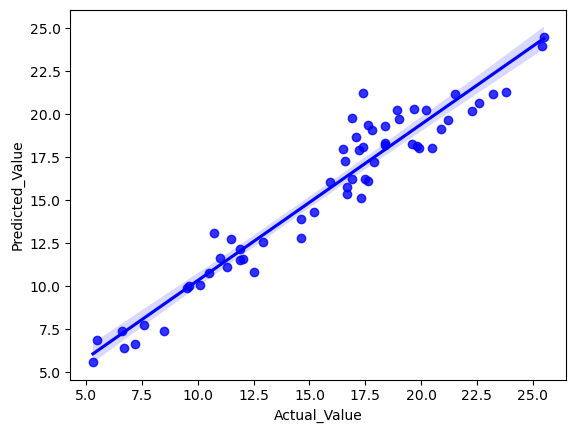

In [56]:
#Actual vs. Predicted Values Plot
sns.regplot(x=df2['Actual_Value'],y=df2['Predicted_Value'],color='blue')

Text(0, 0.5, 'Sales')

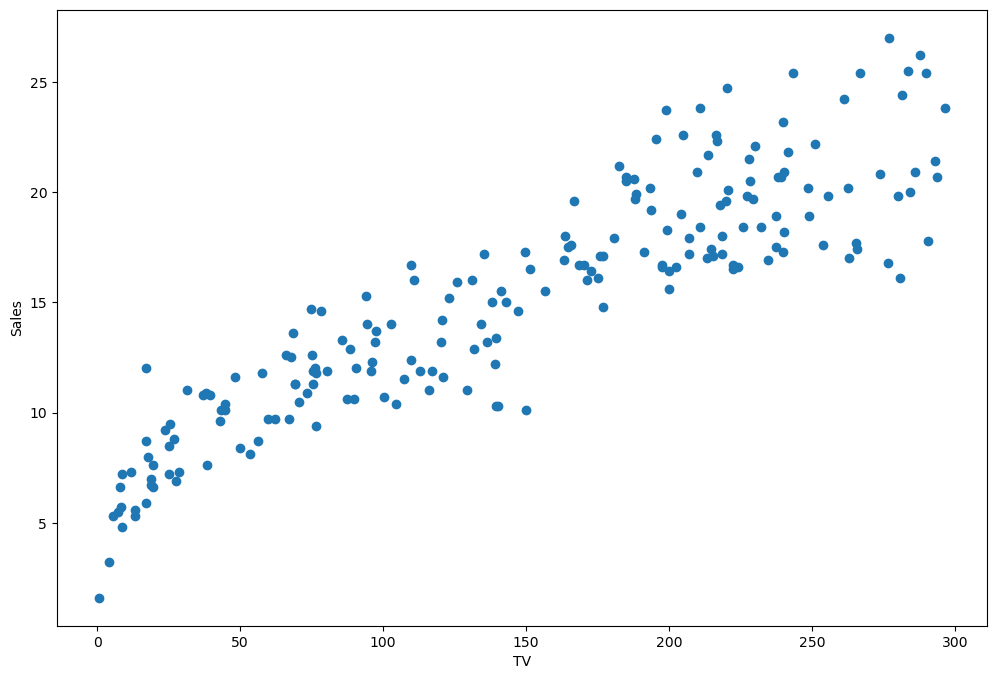

In [64]:
plt.figure(figsize=(12, 8))
plt.scatter(df['TV'],df['Sales'])
plt.xlabel('TV')
plt.ylabel('Sales')

In [66]:
X = df.iloc[:,0:1]
y = df.iloc[:,-1]

In [68]:
X

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8
...,...
195,38.2
196,94.2
197,177.0
198,283.6


In [70]:
y

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [74]:
from sklearn.linear_model import LinearRegression


In [76]:
lr = LinearRegression()

In [78]:
lr.fit(X_train,y_train)

LinearRegression()

In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [82]:
m = lr.coef_
m

array([0.05454575])

In [84]:
c = lr.intercept_
c

6.9486832000013585

In [86]:
predictions = lr.predict(X_test)
predictions

array([ 7.37414007, 19.94148154, 14.32326899, 18.82329361, 20.13239168,
       18.2287449 , 14.54145201, 17.72692398, 18.75238413, 18.77420243,
       13.34144544, 19.46693349, 10.01415451, 17.1923756 , 11.70507285,
       12.08689312, 15.11418241, 16.23237035, 15.8669138 , 13.1068987 ,
       18.65965635, 14.00690363, 17.60692332, 16.60328147, 17.03419291,
       18.96511257, 18.93783969, 11.05597839, 17.03419291, 13.66326538,
       10.6796127 , 10.71234015, 13.5487193 , 17.22510305,  9.67597085,
       13.52144643, 12.25053038, 16.13418799, 19.07965865, 17.48692266,
       18.69783838, 16.53237199, 15.92145955, 18.86693021, 13.5050827 ,
       11.84143724,  7.87050642, 20.51966653, 10.79961336,  9.03233096,
       17.99419817, 16.29237067, 11.04506924, 14.09963141, 18.44147334,
        9.3759692 ,  7.88687015,  8.34505447, 17.72692398, 11.62325422])

In [88]:
print(sqrt(mean_squared_error(y_test, predictions)))


2.0192960089662315


In [90]:
print("The linear model is: Y = {:.5f} + {:.5f}X".format(lr.intercept_, lr.coef_[0]))


The linear model is: Y = 6.94868 + 0.05455X


In [92]:
X = df['TV']
y = df['Sales']

# Add a constant to the training data
X_train_sm = sm.add_constant(X_train)

# Refit the model with the updated data
lr = sm.OLS(y_train, X_train_sm).fit()

print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Wed, 19 Feb 2025   Prob (F-statistic):           1.52e-52
Time:                        19:25:39   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.0

In [94]:
y_train_pred = lr.predict(X_train_sm)
res = (y_train - y_train_pred)

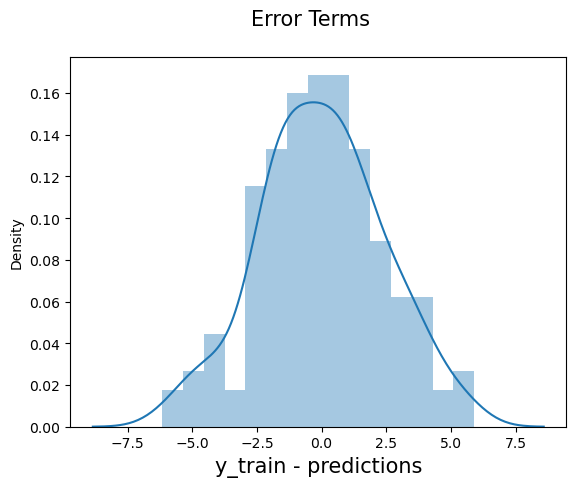

In [96]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('y_train - predictions', fontsize = 15)         # X-label
plt.show()

In [98]:
with open('model2.pkl', 'wb') as file:
    pickle.dump("Gradient Boosting", file)